In [221]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
from math import pi
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [222]:
nx = 41
ny = 41

l = 1
h = 1

dx = 1/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [223]:
def L1norm(new, old):
    norm = np.sum(np.abs(new-old))
    return norm

In [224]:
def poissonIG(uh, dx, dy, nx, ny, xmax, xmin, ymax, ymin):
    
    #Mesh
    x = np.linspace(xmin,xmax,nx)
    y = np.linspace(ymin,ymax,ny)
    X,Y = np.meshgrid(x,y)
    
    #Initialize
    psi_i = np.zeros((ny, nx))
    
    w_i = np.zeros((ny, nx))
    
    w_i[-1,:] = -(1/(2*dy**2))*(8*psi_i[-2,:] - psi_i[-3,:])-(3*uh/dy)
    
    #w_i[1:-1,1:-1] = .25 * (psi_i[:-2,1:-1] + psi_i[2:,1:-1] + psi_i[1:-1,:-2] + psi_i[1:-1,2:])
    
    return X, Y, x, y, psi_i, w_i

In [225]:
def stokes_flow(uh, w, p, dx, dy, l1_target):
    
    l1normw = 1
    l1normpsi = 1
    pn = np.empty_like(p)
    wn = np.empty_like(w)
    iterations = 0
    
    while l1normpsi > l1_target and l1normw > l1_target:
        pn = p.copy()
        wn = w.copy()
        
        # BC for w
        
        w[1:-1,1:-1] = .25 * (wn[:-2,1:-1] + wn[2:,1:-1] + wn[1:-1,:-2] + wn[1:-1,2:])
        
        w[-1,:] = -(1/(2*dy**2))*(8*pn[-2,:] - pn[-3,:])-(3*uh/dy)
        w[0,:] = -(1/(2*dy**2))*(8*pn[1,:] - pn[2,:])
        w[:,0] = -(1/(2*dx**2))*(8*pn[:,1] - pn[:,2])
        w[:,-1] = -(1/(2*dx**2))*(8*pn[:,-2] - pn[:,-3])
        
        'p[1:-1,1:-1] = -((pn[1:-1,2:] + pn[1:-1,:-2])*dy**2 +\
                        (pn[2:,1:-1] + pn[:-2,1:-1])*dx**2 +\
                        wn[1:-1,1:-1]*dx**2*dy**2)/(dx**2 + dy**2)'
        
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1,:-2] + pn[2:,1:-1] + pn[:-2,1:-1]\
                             + w[1:-1,1:-1]*dx**2)
        
        """#Dirichlet BC
        p[:,0] = 0
        p[:,-1] = 0
        p[0,:] = 0
        #Neumann BC
        p[:,1] = p[:,0]
        p[:,-2] = p[:,-1]
        p[1,:] = p[0,:]"""
        l1normw = L1norm(w, wn)
        l1normpsi = L1norm(p, pn)
        iterations += 1
    
    print('l1normw =', l1normw, 'l1normpsi =',l1normpsi )
    return p, w, iterations

In [226]:
X, Y, x, y, psi, w = poissonIG(1, dx, dy, nx, ny, 0, l, 0, h)

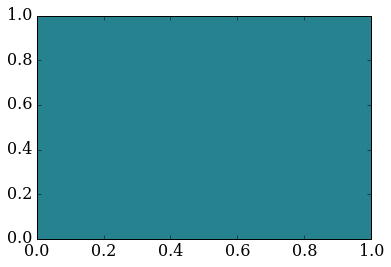

In [227]:
plt.contourf(x, y, psi,cmap=cm.viridis)

In [228]:
p, w, i = stokes_flow(1, w, psi, dx, dy, l1_target)
#p = np.flipud(p)
#w = np.flipud(w)

l1normw = 0.000146063423316 l1normpsi = 9.9314678408e-07


In [229]:
psi.shape

(41, 41)

In [230]:
w.shape

(41, 41)

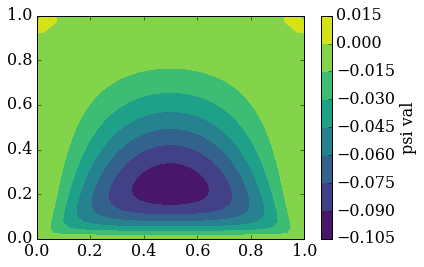

In [231]:
plot = plt.contourf(x, y, p,cmap=cm.viridis)
cbar = plt.colorbar(plot)
cbar.ax.set_ylabel('psi val')

In [232]:
print(i)

2771


In [233]:
#np.set_printoptions(threshold=None)

In [234]:
print(w)

[[ -0.00000000e+00  -7.28736853e-03  -1.37945261e-02 ...,  -1.37945261e-02
   -7.28736853e-03  -0.00000000e+00]
 [ -7.31234508e-03   2.04536217e-03   1.14113234e-02 ...,   1.14113234e-02
    2.04536217e-03  -7.31234508e-03]
 [ -1.39943385e-02   1.13698526e-02   3.23122312e-02 ...,   3.23122312e-02
    1.13698526e-02  -1.39943385e-02]
 ..., 
 [  2.84608778e+01   3.17800742e+00  -7.89273708e+00 ...,  -7.89273708e+00
    3.17800742e+00   2.84608778e+01]
 [  3.61967436e+01  -1.53446722e+01  -2.25607787e+01 ...,  -2.25607787e+01
   -1.53446722e+01   3.61967436e+01]
 [ -0.00000000e+00  -7.81926610e+01  -4.66543589e+01 ...,  -4.66543589e+01
   -7.81926610e+01  -0.00000000e+00]]


In [235]:
np.max(np.abs(w))

78.192660960145787

In [236]:
np.round(p[32,::8], 4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])